# **Load the data file and the libraries**

In [80]:
# UPLOADING DATA FILE

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Image PSNR.csv to Image PSNR (1).csv
User uploaded file "Image PSNR.csv" with length 1396 bytes


In [81]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

# **Display basic info about the dataset**

In [82]:
df = pd.read_csv('Image PSNR.csv')

display(df)

,Image,SOTA,Ours
0,1,24.214067,24.706043
1,2,17.987777,20.266122
2,3,23.177050,24.545194
3,4,27.657241,27.191447
4,5,20.177863,24.193468
5,6,18.870061,22.444099
6,7,24.025279,27.060473
7,8,25.533293,27.623930
8,9,27.903448,27.969485
9,10,21.415174,21.673041


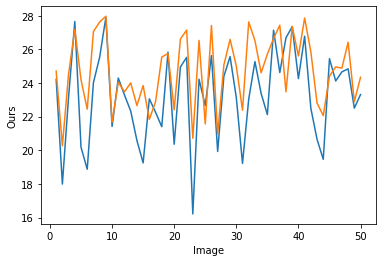

In [83]:
# Raw plot that looks ugly

sb.lineplot(data=df,x='Image',y='SOTA')
sb.lineplot(data=df,x='Image',y='Ours')

In [84]:
# Create a column with difference between SOTA and ours

df['Diff'] = df.apply(lambda row: row.Ours - row.SOTA, axis = 1)
display(df)

,Image,SOTA,Ours,Diff
0,1,24.214067,24.706043,0.491976
1,2,17.987777,20.266122,2.278346
2,3,23.177050,24.545194,1.368143
3,4,27.657241,27.191447,-0.465794
4,5,20.177863,24.193468,4.015605
5,6,18.870061,22.444099,3.574038
6,7,24.025279,27.060473,3.035195
7,8,25.533293,27.623930,2.090637
8,9,27.903448,27.969485,0.066037
9,10,21.415174,21.673041,0.257867


In [85]:
# Sort by Diff in descending order

df.sort_values(by=['Diff'], inplace = True, ascending = False)
display(df)

,Image,SOTA,Ours,Diff
14,15,19.246965,23.849088,4.602122
31,32,23.046378,27.632139,4.585761
22,23,16.213923,20.710478,4.496555
17,18,21.397043,25.545622,4.148580
4,5,20.177863,24.193468,4.015605
34,35,22.120273,25.715585,3.595312
5,6,18.870061,22.444099,3.574038
41,42,22.498367,25.855095,3.356728
30,31,19.218366,22.381802,3.163435
6,7,24.025279,27.060473,3.035195


Column named Index already exists


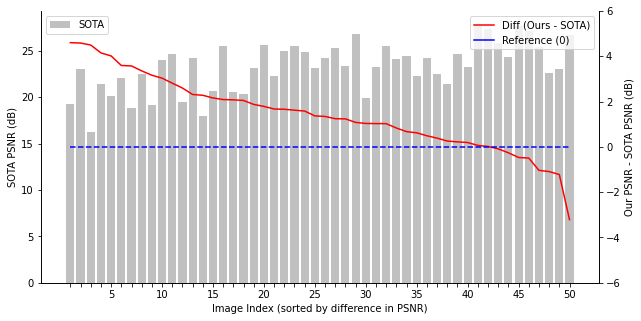

In [99]:
# BEAUTIFUL PLOT

# Try adding a column to plot index on x-axis (unless it already exists)
try:
  df.insert(1, 'Index', range(0,df.shape[0], True))
except:
  print('Column named Index already exists')

# Set large figure size
fig = plt.figure(figsize=(10,5))

# Set muted colors
sb.set_color_codes('muted')

# Left side plot will be a bar graph
ax1 = sb.barplot(x = df['Index']+1, y = df['SOTA'], color = 'silver', label="SOTA")
plt.ylabel("SOTA PSNR (dB)")
plt.xlabel("Image Index (sorted by difference in PSNR)")

# Remove all but every fifth index from x-axis to remove crowding
labels = ax1.get_xticklabels()
for i in range(0,df.shape[0]):
  if (i%5) == 4:
    labels[i].set_visible(True)
  else:
    labels[i].set_visible(False)
ax1.legend()

# Set right (secondary y) axis
ax2 = ax1.twinx()
ax2 = sb.lineplot(x = df['Index'], y = df['Diff'], color = 'red', label="Diff (Ours - SOTA)")

# Add reference line where PSNR is 0 (no difference)
ax2 = sb.lineplot(x = df['Index'], y = 0*df['Diff'], color = 'blue', label="Reference (0)")
ax2.lines[1].set_linestyle("--")
plt.ylabel("Our PSNR - SOTA PSNR (dB)")
plt.ylim(-6,6)

# Remove unnecessary lines
sb.despine(top=True, right=False, left=False)